In [13]:
import os
import pandas as pd
from feature_functions import apply_zscore_signal
from utils.backtester import Backtester

# Directory containing asset data
asset_dir = './hist_data/crypto/kraken_4hr/'

# Initialize EV dictionary
asset_ev_dict = {}
df_dict = {}
reg_window = 5
reg_thresh = .75
# Iterate over all assets
for asset_file in os.listdir(asset_dir):
    if asset_file.endswith('.txt'):
        asset_path = os.path.join(asset_dir, asset_file)
        df = pd.read_csv(asset_path, sep=',')
        df['Date'] = pd.to_datetime(df['date'], unit='s')
        df_dict[asset_file] = df

ADAUSDT.txt


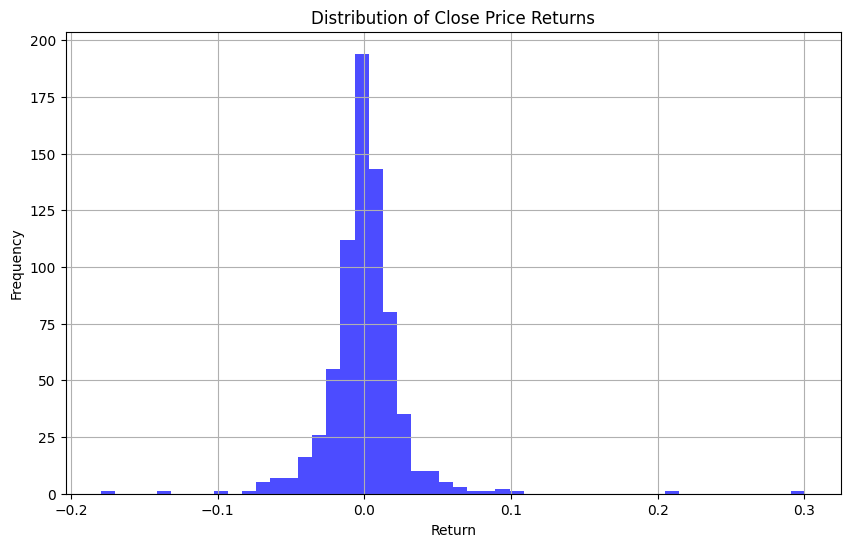

In [16]:
import matplotlib.pyplot as plt

syms = list(df_dict.keys())

df = df_dict[syms[0]]

print(syms[0])
returns = df['close'].pct_change().dropna()

plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Close Price Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Green candles: 88     40.0
89     40.0
90     40.0
91     40.0
92     39.0
       ... 
715    41.0
716    40.0
717    40.0
718    39.0
719    40.0
Length: 632, dtype: float64
Red candles: 88     49.0
89     49.0
90     49.0
91     49.0
92     50.0
       ... 
715    48.0
716    49.0
717    49.0
718    50.0
719    49.0
Length: 632, dtype: float64


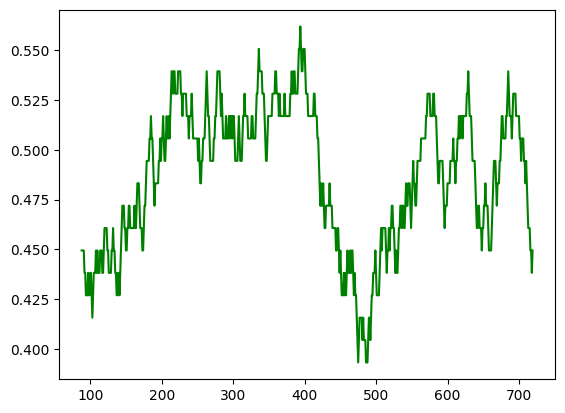

In [18]:
green_candles = (df['close'] > df['open']).rolling(89).sum().dropna()
red_candles = (df['close'] < df['open']).rolling(89).sum().dropna()

print(f"Green candles: {green_candles}")
print(f"Red candles: {red_candles}")
rolling_ratio = green_candles / (green_candles + red_candles)

plt.plot(rolling_ratio, label='Rolling Ratio of Green Candles', color='green')
plt.show()